In [1]:
#useful modules

import cv2
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams["figure.figsize"]=5,5

# Q1

In [2]:
img1 = cv2.cvtColor(cv2.imread('cameraman.jpg'), cv2.COLOR_BGR2GRAY)
print(img1.shape)

img1_fft = np.fft.fft2(img1)

img1_fft_shift = np.fft.fftshift(img1_fft)

img1_fft_shift_magnitude = np.abs(img1_fft_shift)

img1_fft_shift_magnitude_log = np.log(1+np.abs(img1_fft_shift))

img1_fft_shift_phase = np.angle(img1_fft_shift)

(256, 256)


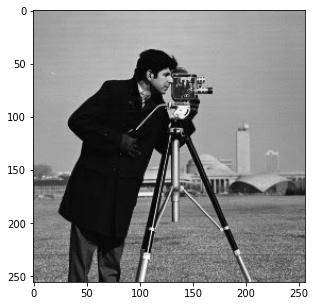

In [3]:
plt.imshow(img1,cmap='gray')
plt.show()

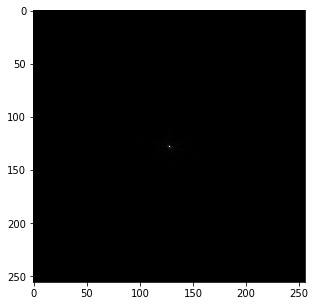

In [4]:
plt.imshow(img1_fft_shift_magnitude,cmap='gray')
plt.show()

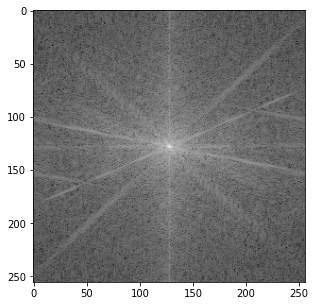

In [5]:
plt.imshow(img1_fft_shift_magnitude_log,cmap='gray')
plt.show()

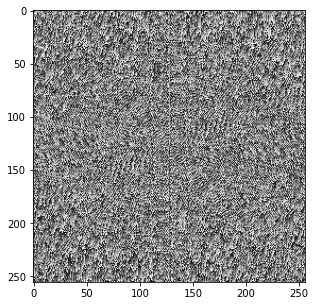

In [6]:
plt.imshow(img1_fft_shift_phase,cmap='gray')
plt.show()

In [7]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

In [8]:
lowpass_filter = idealFilterLP(30,img1.shape)
highpass_filter = idealFilterHP(30,img1.shape)

img1_fft_shift_magnitude_LP = img1_fft_shift_magnitude*lowpass_filter
img1_fft_shift_magnitude_HP = img1_fft_shift_magnitude*highpass_filter

img1_fft_shift_LP = img1_fft_shift_magnitude_LP*np.exp(1j*img1_fft_shift_phase)
img1_fft_shift_HP = img1_fft_shift_magnitude_HP*np.exp(1j*img1_fft_shift_phase)

img1_fft_LP = np.fft.ifftshift(img1_fft_shift_LP)
img1_fft_HP = np.fft.ifftshift(img1_fft_shift_HP)

img1_LP = np.abs(np.fft.ifft2(img1_fft_LP))
img1_HP = np.abs(np.fft.ifft2(img1_fft_HP))

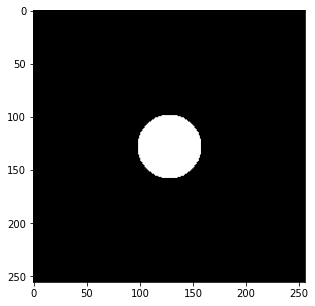

In [9]:
plt.imshow(lowpass_filter,cmap='gray')
plt.show()

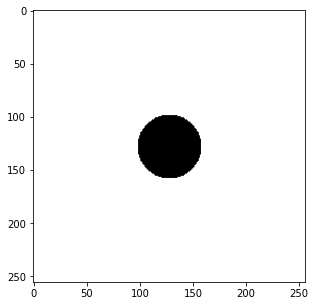

In [10]:
plt.imshow(highpass_filter,cmap='gray')
plt.show()

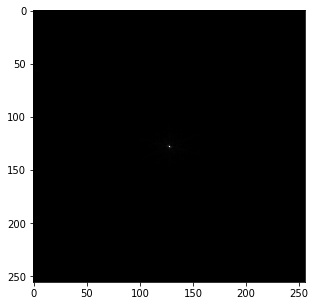

In [11]:
plt.imshow(img1_fft_shift_magnitude_LP,cmap='gray')
plt.show()

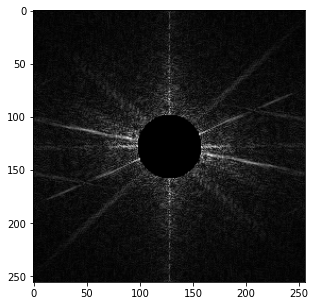

In [12]:
plt.imshow(img1_fft_shift_magnitude_HP,cmap='gray')
plt.show()

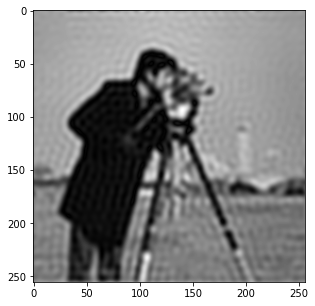

In [13]:
plt.imshow(img1_LP,cmap='gray')
plt.show()

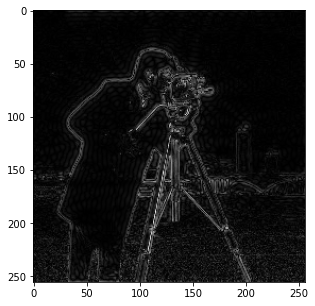

In [14]:
plt.imshow(img1_HP,cmap='gray')
plt.show()

# Q2

In [20]:
img21 = cv2.cvtColor(cv2.imread('einstein.jpg'), cv2.COLOR_BGR2GRAY)

img21 = cv2.resize(img21, (256, 256), interpolation = cv2.INTER_NEAREST)

img21_fft = np.fft.fft2(img21)

img21_fft_shift = np.fft.fftshift(img21_fft)

img21_fft_shift_magnitude = np.abs(img21_fft_shift)

img21_fft_shift_phase = np.angle(img21_fft_shift)

print(img21.shape)

(256, 256)


In [21]:
img22 = cv2.cvtColor(cv2.imread('lena_face.jpg'), cv2.COLOR_BGR2GRAY)

img22 = cv2.resize(img22, (256, 256), interpolation = cv2.INTER_NEAREST)

img22_fft = np.fft.fft2(img22)

img22_fft_shift = np.fft.fftshift(img22_fft)

img22_fft_shift_magnitude = np.abs(img22_fft_shift)

img22_fft_shift_phase = np.angle(img22_fft_shift)

print(img22.shape)

(256, 256)


In [22]:
img2_p21_m22_fft_shift = img22_fft_shift_magnitude*np.exp(1j*img21_fft_shift_phase)
img2_p22_m21_fft_shift = img21_fft_shift_magnitude*np.exp(1j*img22_fft_shift_phase)

img2_p21_m22_fft = np.fft.ifftshift(img2_p21_m22_fft_shift)
img2_p22_m21_fft = np.fft.ifftshift(img2_p22_m21_fft_shift)

img2_p21_m22 = np.abs(np.fft.ifft2(img2_p21_m22_fft))
img2_p22_m21 = np.abs(np.fft.ifft2(img2_p22_m21_fft))

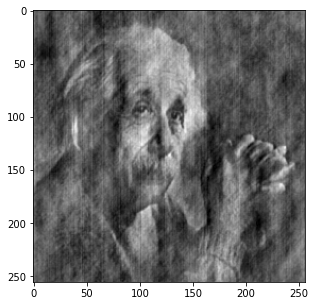

In [23]:
plt.imshow(img2_p21_m22,cmap='gray')
plt.show()

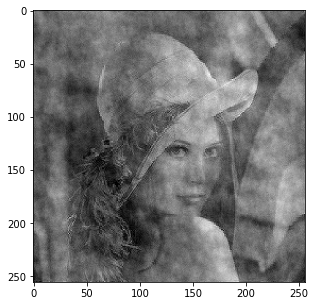

In [24]:
plt.imshow(img2_p22_m21,cmap='gray')
plt.show()

# Q3

In [35]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

In [36]:
D0 = 30

img3 = cv2.cvtColor(cv2.imread('cameraman.jpg'), cv2.COLOR_BGR2GRAY)
imgShape = img3.shape

img3_fft = np.fft.fft2(img3)
img3_fft_shift = np.fft.fftshift(img3_fft)

ideal_LP = idealFilterLP(D0,imgShape)
ideal_HP = idealFilterHP(D0,imgShape)

butterworth_LP = butterworthLP(D0,imgShape,2)
butterworth_HP = butterworthHP(D0,imgShape,2)

gaussian_LP = gaussianLP(D0,imgShape)
gaussian_HP = gaussianHP(D0,imgShape)

img3_fft_shift_ideal_LP = img3_fft_shift * ideal_LP
img3_fft_shift_ideal_HP = img3_fft_shift * ideal_HP
img3_fft_shift_butterworth_LP = img3_fft_shift * butterworth_LP
img3_fft_shift_butterworth_HP = img3_fft_shift * butterworth_HP
img3_fft_shift_gaussian_LP = img3_fft_shift * gaussian_LP
img3_fft_shift_gaussian_HP = img3_fft_shift * gaussian_HP

img3_fft_ideal_LP = np.fft.ifftshift(img3_fft_shift_ideal_LP)
img3_fft_ideal_HP = np.fft.ifftshift(img3_fft_shift_ideal_HP)
img3_fft_butterworth_LP = np.fft.ifftshift(img3_fft_shift_butterworth_LP)
img3_fft_butterworth_HP = np.fft.ifftshift(img3_fft_shift_butterworth_HP)
img3_fft_gaussian_LP = np.fft.ifftshift(img3_fft_shift_gaussian_LP)
img3_fft_gaussian_HP = np.fft.ifftshift(img3_fft_shift_gaussian_HP)

img3_ideal_LP = np.abs(np.fft.ifft2(img3_fft_ideal_LP))
img3_ideal_HP = np.abs(np.fft.ifft2(img3_fft_ideal_HP))
img3_butterworth_LP = np.abs(np.fft.ifft2(img3_fft_butterworth_LP))
img3_butterworth_HP = np.abs(np.fft.ifft2(img3_fft_butterworth_HP))
img3_gaussian_LP = np.abs(np.fft.ifft2(img3_fft_gaussian_LP))
img3_gaussian_HP = np.abs(np.fft.ifft2(img3_fft_gaussian_HP))

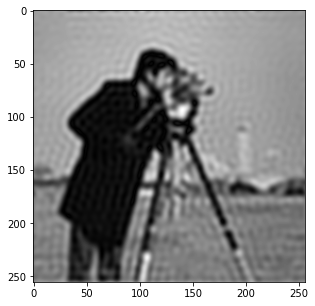

In [37]:
plt.imshow(img3_ideal_LP,cmap='gray')
plt.show()

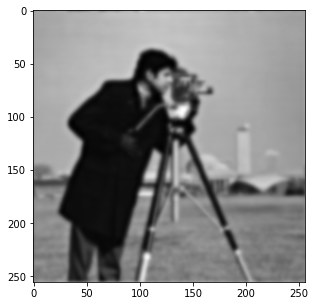

In [38]:
plt.imshow(img3_butterworth_LP,cmap='gray')
plt.show()

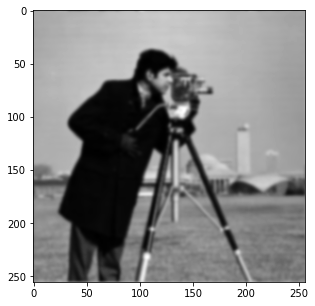

In [39]:
plt.imshow(img3_gaussian_LP,cmap='gray')
plt.show()

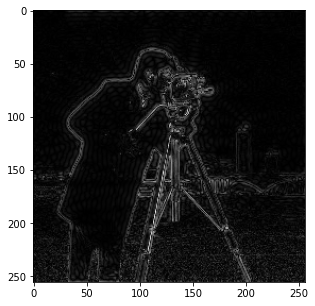

In [40]:
plt.imshow(img3_ideal_HP,cmap='gray')
plt.show()

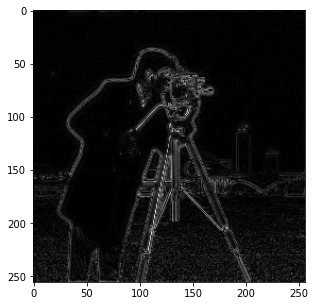

In [41]:
plt.imshow(img3_butterworth_HP,cmap='gray')
plt.show()

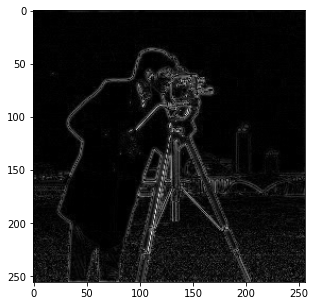

In [42]:
plt.imshow(img3_gaussian_HP,cmap='gray')
plt.show()

# Q4

In [73]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def space_highpass(img,size,A):
    gauss_blur = cv2.GaussianBlur(img, (size,size), 0)
    sharped_img = cv2.addWeighted(img, A, gauss_blur, -1, 0)
    return sharped_img

def freq_highpass(img,size,A):
    imgShape = img.shape
    img_fft = np.fft.fft2(img)
    img_fft_shift = np.fft.fftshift(img_fft)
    gaussian_HP = gaussianHP(size,imgShape)
    img_fft_shift_gaussian_HP = img_fft_shift * gaussian_HP
    sharped_img_fft_shift = (A-1)*img_fft_shift + img_fft_shift_gaussian_HP
    sharped_img_fft = np.fft.ifftshift(sharped_img_fft_shift)
    sharped_img = np.abs(np.fft.ifft2(sharped_img_fft))
    
    sharped_img = sharped_img - np.min(sharped_img)
    sharped_img = np.array(255*(sharped_img/np.max(sharped_img)),dtype='uint8')
    
    return sharped_img

In [74]:
size1 = 3
size2 = [10000,1000,100,10,1]
img4 = cv2.cvtColor(cv2.imread('cameraman.jpg'), cv2.COLOR_BGR2GRAY)
img4_1 = space_highpass(img4,size1,2)
img4_21 = freq_highpass(img4,size2[0],2)
img4_22 = freq_highpass(img4,size2[1],2)
img4_23 = freq_highpass(img4,size2[2],2)
img4_24 = freq_highpass(img4,size2[3],2)
img4_25 = freq_highpass(img4,size2[4],2)

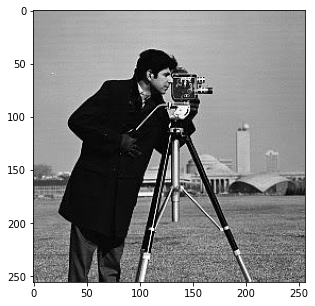

In [75]:
plt.imshow(img4_1,cmap='gray')
plt.show()

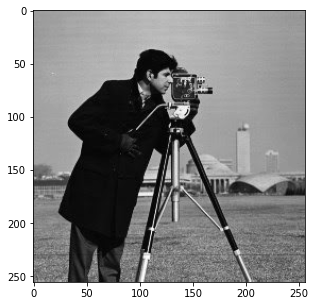

In [76]:
plt.imshow(img4_21,cmap='gray')
plt.show()

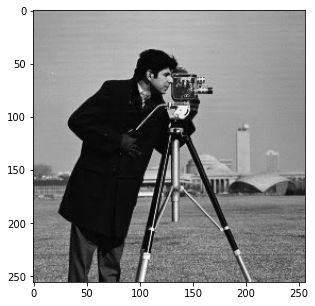

In [77]:
plt.imshow(img4_22,cmap='gray')
plt.show()

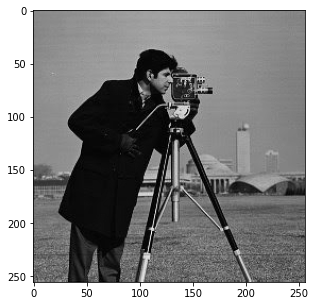

In [78]:
plt.imshow(img4_23,cmap='gray')
plt.show()

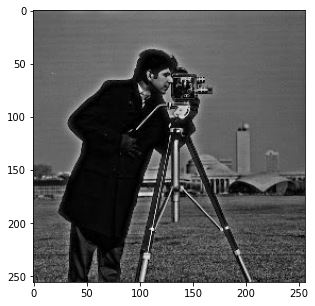

In [79]:
plt.imshow(img4_24,cmap='gray')
plt.show()

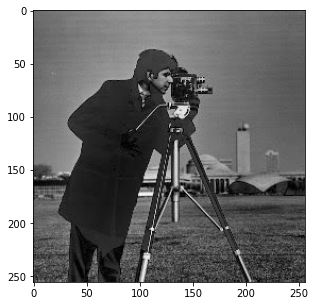

In [80]:
plt.imshow(img4_25,cmap='gray')
plt.show()